**Prática de Segmentação de imagens**

In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

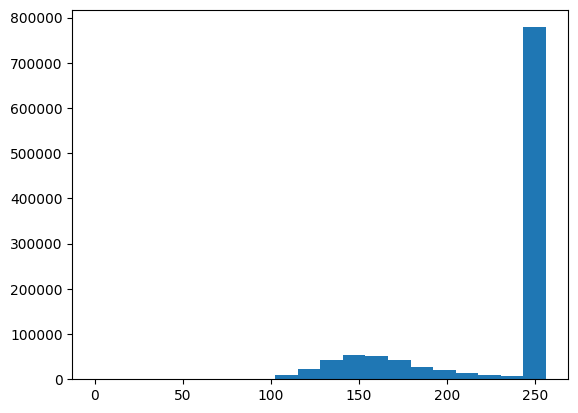

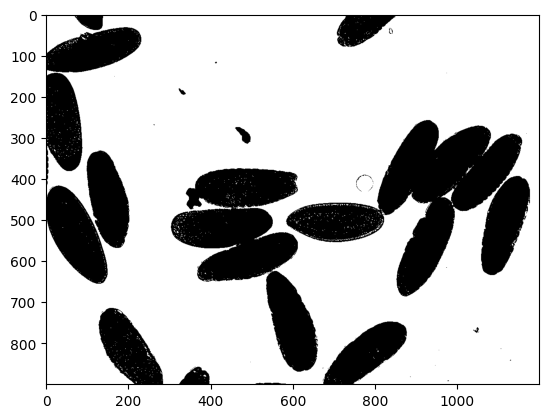

In [64]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)


# histograma com 20 col para melhor vizualizar
plt.hist(img1.ravel(), 20, [0, 256])
plt.show()

#Limiarizar a imagem (escolhemos 240 por ser o vale)
thresh = 240
binary = np.uint8(img1 > thresh)


# Mostrar imagens resultantes
plt.imshow(binary, cmap='gray')
plt.show()

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

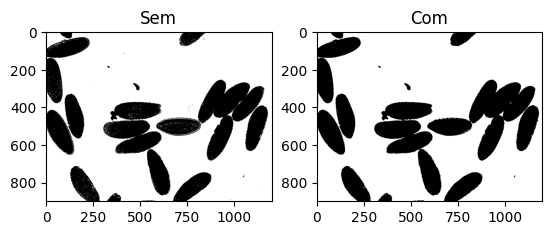

In [60]:
def adaptive_threshold(img, deltaT):
    # passo 1: estimativa inicial para o limiar T
    T = np.mean(img)

    # repetir os passos de 2 a 4 até que a diferença entre dois valores sucessivos de T seja menor ou igual a deltaT
    while True:
        # passo 2: segmentar a imagem usando T
        mask = img > T

        # passo 3: calcular a média das intensidades dos pixels em cada região
        mean_fg = np.mean(img[mask])
        mean_bg = np.mean(img[~mask])

        # passo 4: calcular o novo valor de T
        new_T = (mean_fg + mean_bg) / 2

        # checar se a diferença entre dois valores sucessivos de T é menor ou igual a deltaT
        if abs(new_T - T) <= deltaT:
            break

        T = new_T

    # retornar a imagem segmentada
    return (img > T).astype(np.uint8) * 255


# Sem suavisar
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
tresh = adaptive_threshold(img1, 240)

# Aplicando filtro gaussiano para suavizar a imagem
kernel = np.ones((5,5),np.float32)/25
blur = cv2.filter2D(img1,cv2.CV_64F,kernel)
tresh1 = adaptive_threshold(blur, 240)


# Mostrar imagens resultantes
plt.subplot(1, 2, 1), plt.imshow(tresh, cmap='gray')
plt.title('Sem'),
plt.subplot(1, 2, 2), plt.imshow(tresh1, cmap='gray')
plt.title('Com'),
plt.show()



3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

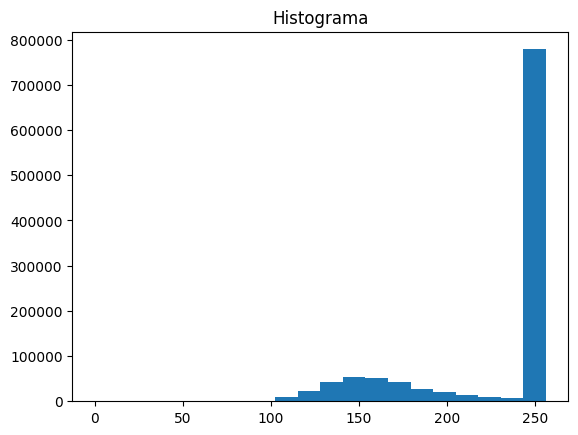

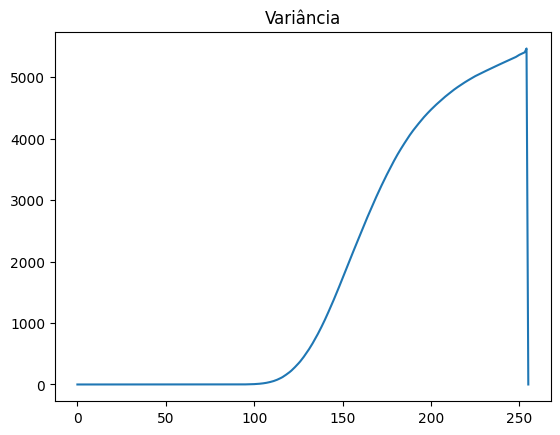

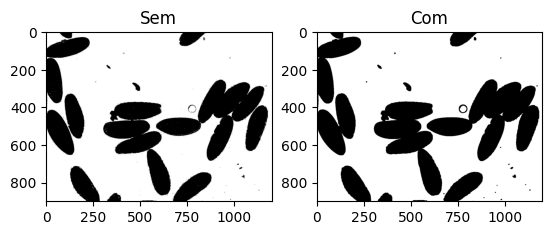

In [12]:
def otsu_threshold(img):
    # calcular o histograma da imagem
    hist, _ = np.histogram(img, bins=256, range=(0, 255))

    # normalizar o histograma
    hist_norm = hist / np.sum(hist)

    # calcular as médias cumulativas
    mean_cumulative = np.cumsum(hist_norm)
    mean_cumulative_normalized = np.cumsum(hist_norm * np.arange(256))

    # calcular as variâncias entre classes para todos os possíveis valores de limiar
    variance_between_classes = ((mean_cumulative * mean_cumulative_normalized - 
                                mean_cumulative_normalized) ** 2 /
                                (mean_cumulative * (1 - mean_cumulative) + 1e-10)) #1e-10 é apenas uma constante para não ter divisões por 0

    # encontrar o valor de limiar que maximiza a variância entre classes
    threshold = np.argmax(variance_between_classes)

    # segmentar a imagem usando o limiar encontrado
    mask = img > threshold

    return mask.astype(np.uint8) * 255, variance_between_classes

# carregar a imagem em escala de cinza
img = cv2.imread('insitu107595.jpg', cv2.IMREAD_GRAYSCALE)

# aplicar a segmentação de Otsu
mask, variances = otsu_threshold(img)

# Aplicando filtro gaussiano para suavizar a imagem
kernel = np.ones((5,5),np.float32)/25
blur = cv2.filter2D(img,cv2.CV_64F,kernel)
mask1, variances1 = otsu_threshold(blur)

# histograma com 20 col para melhor vizualizar
plt.hist(img.ravel(), 20, [0, 256])
plt.title('Histograma')
plt.show()

# variância
plt.plot(variances),
plt.title('Variância'),
plt.show()

# Mostrar imagens resultantes
plt.subplot(1, 2, 1), plt.imshow(mask, cmap='gray')
plt.title('Sem'),
plt.subplot(1, 2, 2), plt.imshow(mask1, cmap='gray')
plt.title('Com'),
plt.show()


In [ ]:
4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18004\1584705233.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1), plt.imshow(mask, cmap='gray')


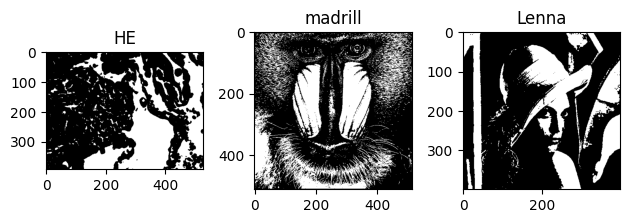

In [21]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

# carregar a imagem em escala de cinza
img = cv2.imread('HE.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('madrill.tiff', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('Lenna.jpg', cv2.IMREAD_GRAYSCALE)

# aplicar a segmentação de Otsu
mask, variances = otsu_threshold(img)

# aplicar a segmentação de Otsu
mask2, variances2 = otsu_threshold(img2)

# aplicar a segmentação de Otsu
mask3, variances = otsu_threshold(img3)

# Mostrar imagens resultantes
plt.subplot(1, 3, 1), plt.imshow(mask, cmap='gray')
plt.title('HE'),
plt.subplot(1, 3, 2), plt.imshow(mask2, cmap='gray')
plt.title('madrill'),
plt.subplot(1, 3, 3), plt.imshow(mask3, cmap='gray')
plt.title('Lenna'),
plt.tight_layout()  # ajustar a escala das imagens

plt.show()
